# Example 1

Below is a short example of how to use the framework using data fetched from `yfinance`.


## Imports

In [1]:
import sys
import datetime
import os

import yfinance as yf
import pandas as pd

from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv('local_path'))

## Fetching data using yfinance

In [2]:
ticker_symbol = "AAPL"

ticker = yf.Ticker(ticker_symbol)

historical_data = ticker.history(period="1y")  # data for the last year

data = historical_data.reset_index()
data.rename(columns = {'Date':'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace = True)
data.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

## Loading using dataloader

In [3]:
from backtrader.backtesting.backtester.backtester import Backtester

In [4]:
class SimpleBacktester(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        
    def make_decision(self, data_point):
                
        if data_point.close < self.past_data[-1].close:
            decision = 1  # buy the whole portfolio
        elif data_point.close > self.past_data[-1].close:
            decision = -1  # sell the whole portfolio
        else:
            decision = 0  # hold
                        
        return decision


In [5]:
from backtrader.backtesting.data.data_loader import MarketData

market_data = MarketData(data)  # wrap the DataFrame properly
tester = SimpleBacktester(market_data)
results = tester.run_simulation()
print(results)

Error in decision for 2024-06-04 00:00:00-04:00. list index out of range. Holding position.
[25000.0, 25000.0, 25000.0, 25002.39878845215, 25002.39878845215, 25016.363479614258, 25016.363479614258, 25016.363479614258, 25016.363479614258, 25020.524032592773, 25020.524032592773, 25015.935501098633, 25011.575942993164, 25013.51676940918, 25015.36814880371, 25019.528686523438, 25019.528686523438, 25019.528686523438, 25025.630157470703, 25025.630157470703, 25025.630157470703, 25025.630157470703, 25025.630157470703, 25025.630157470703, 25025.630157470703, 25025.630157470703, 25028.586334228516, 25028.586334228516, 25028.586334228516, 25028.586334228516, 25023.90818786621, 25024.16700744629, 25023.818649291992, 25025.90882873535, 25019.46893310547, 25017.37875366211, 25018.78221130371, 25019.339614868164, 25019.897003173828, 25019.897003173828, 25019.897003173828, 25021.390014648438, 25021.390014648438, 25019.3595123291, 25024.515396118164, 25027.989135742188, 25027.989135742188, 25027.989135

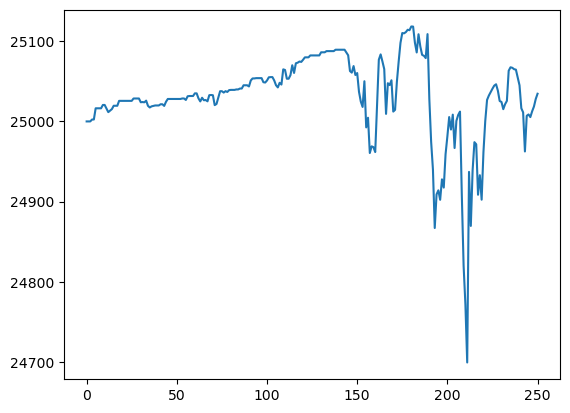

In [6]:
import matplotlib.pyplot as plt

plt.plot(results)